In [33]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DATA
Let's have a look at all the data files

In [34]:
!kaggle competitions download -c llm-detect-ai-generated-text


  0%|                                               | 0.00/1.38M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 1.38M/1.38M [00:00<00:00, 681MB/s]


In [35]:
import zipfile

with zipfile.ZipFile('llm-detect-ai-generated-text.zip', 'r') as zip_ref:
    zip_ref.extractall('./data/llm-detect-ai-generated-text/')

In [36]:
DATA_DIR = './data/llm-detect-ai-generated-text/'

for dirname, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/llm-detect-ai-generated-text/train_prompts.csv
./data/llm-detect-ai-generated-text/test_essays.csv
./data/llm-detect-ai-generated-text/train_essays.csv
./data/llm-detect-ai-generated-text/sample_submission.csv


# EDA

In [37]:
df_train_prompts = pd.read_csv(DATA_DIR + "train_prompts.csv")
print(df_train_prompts.info())
df_train_prompts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 196.0+ bytes
None


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


**Only two prompts are used in this dataset.**

Let's look at the distribution of text/generated in the training set.

In [38]:
df_train_essays = pd.read_csv(DATA_DIR + "train_essays.csv")
print(df_train_essays.info())
df_train_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


Text(0.5, 1.0, 'Distribution of prompt ID')

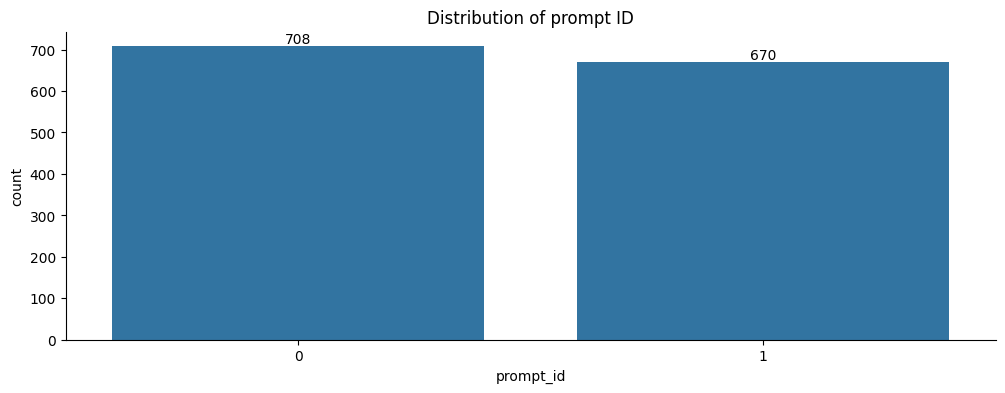

In [39]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="prompt_id")

abs_values = df_train_essays['prompt_id'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of prompt ID")

Text(0.5, 1.0, 'Distribution of Generated Text')

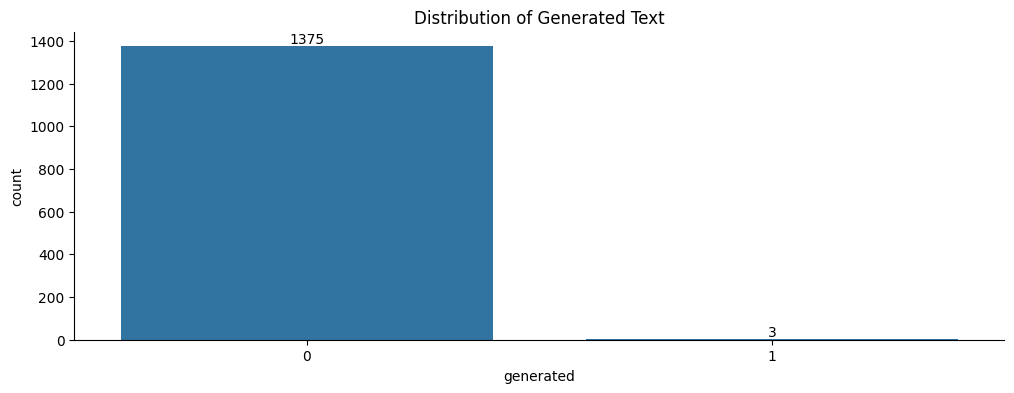

In [40]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="generated")

abs_values = df_train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

**1375 essays are written by human and only 3 by AI.**

**The distribution between the two prompts is pretty equal.**

# Add new data to the training dataset
Lets borrow the generated data points from [DAREK KŁECZEK](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/discussion/455517)

In [41]:
!kaggle datasets download thedrcat/daigt-v2-train-dataset

Dataset URL: https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset
License(s): other
  0%|                                               | 0.00/28.5M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 28.5M/28.5M [00:00<00:00, 1.94GB/s]


In [42]:
with zipfile.ZipFile('daigt-v2-train-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./data/daigt-v2-train-dataset/')

In [43]:
df_train_essays_ext = pd.read_csv('./data/daigt-v2-train-dataset/train_v2_drcat_02.csv')

df_train_essays_ext.rename(columns = {"label":"generated"}, inplace=True)

df_train_essays_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [44]:
df_train_essays_ext.head()

,text,generated,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


Text(0.5, 1.0, 'Distribution of Generated Text')

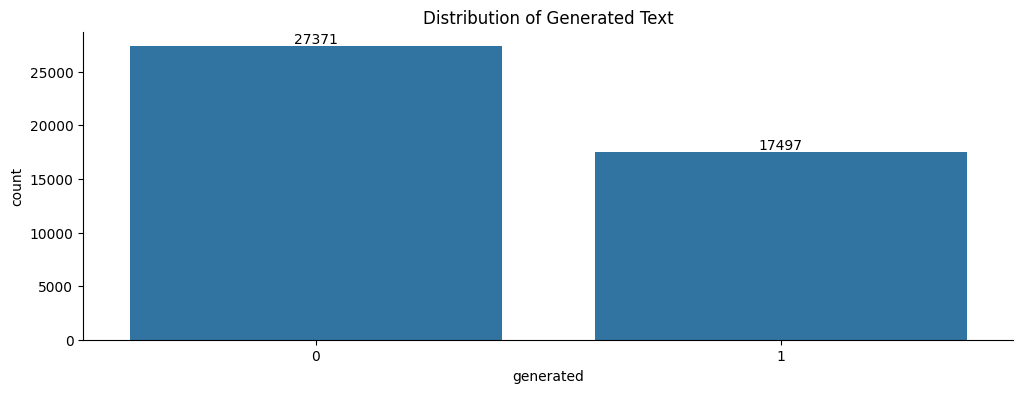

In [45]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_ext,
                   x="generated")

abs_values = df_train_essays_ext['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [46]:
df_train_essays


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [47]:
df_train_essays_final = pd.concat([df_train_essays_ext[["text", "generated"]], df_train_essays[["text", "generated"]]])

df_train_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46246 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


# Prepare data

Let's count the number of words in each essay

In [48]:
df_train_essays_final["text_length"] = df_train_essays_final["text"].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

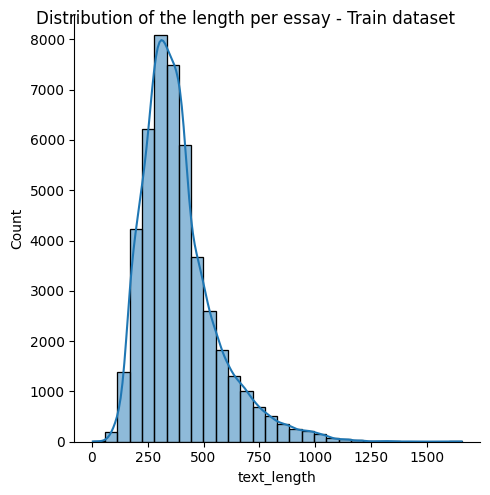

In [49]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=df_train_essays_final,
                 x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")


In [50]:
df_train_essays_final["text_length"].mean() + df_train_essays_final["text_length"].std()

np.float64(556.1289768295229)

## Train test split

In [51]:
from sklearn.model_selection import train_test_split

# Stratified split to maintain proportion of generated/non-generated
X_train, X_test, y_train, y_test = train_test_split(
    df_train_essays_final["text"], 
    df_train_essays_final["generated"],
    test_size=0.2,
    random_state=42,
    stratify=df_train_essays_final["generated"]
)


In [52]:
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 36996
Test size: 9250


## TF-IDF Features

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform
X_train = vectorizer.fit_transform(X_train)

# feature names
features = vectorizer.get_feature_names_out()

X_test = vectorizer.transform(X_test)

# Models

In [55]:
from sklearn.metrics import roc_auc_score, accuracy_score

def run_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"AUC-ROC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    return y_pred, roc_auc, accuracy


In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        display_labels=["Not Generated","Generated"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

Model: Logistic Regression
AUC-ROC: 0.9877
Accuracy: 0.9897


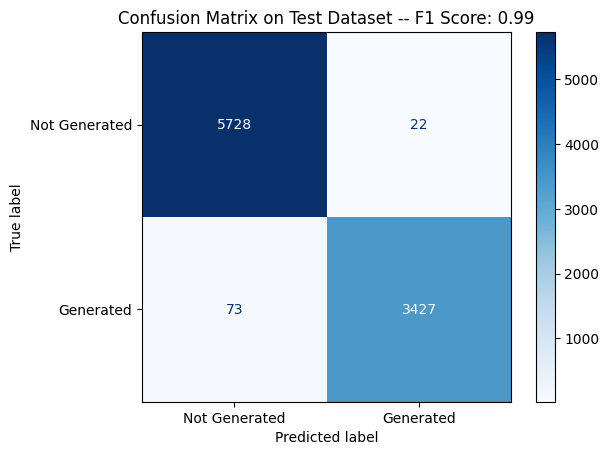

In [58]:
lr_model = LogisticRegression(random_state=42)

y_pred, lr_roc_auc, lr_accuracy = run_model(lr_model, X_train, y_train, X_test, y_test, "Logistic Regression")

displayConfusionMatrix(np.asarray(y_test), np.asarray(y_pred),  "Test")

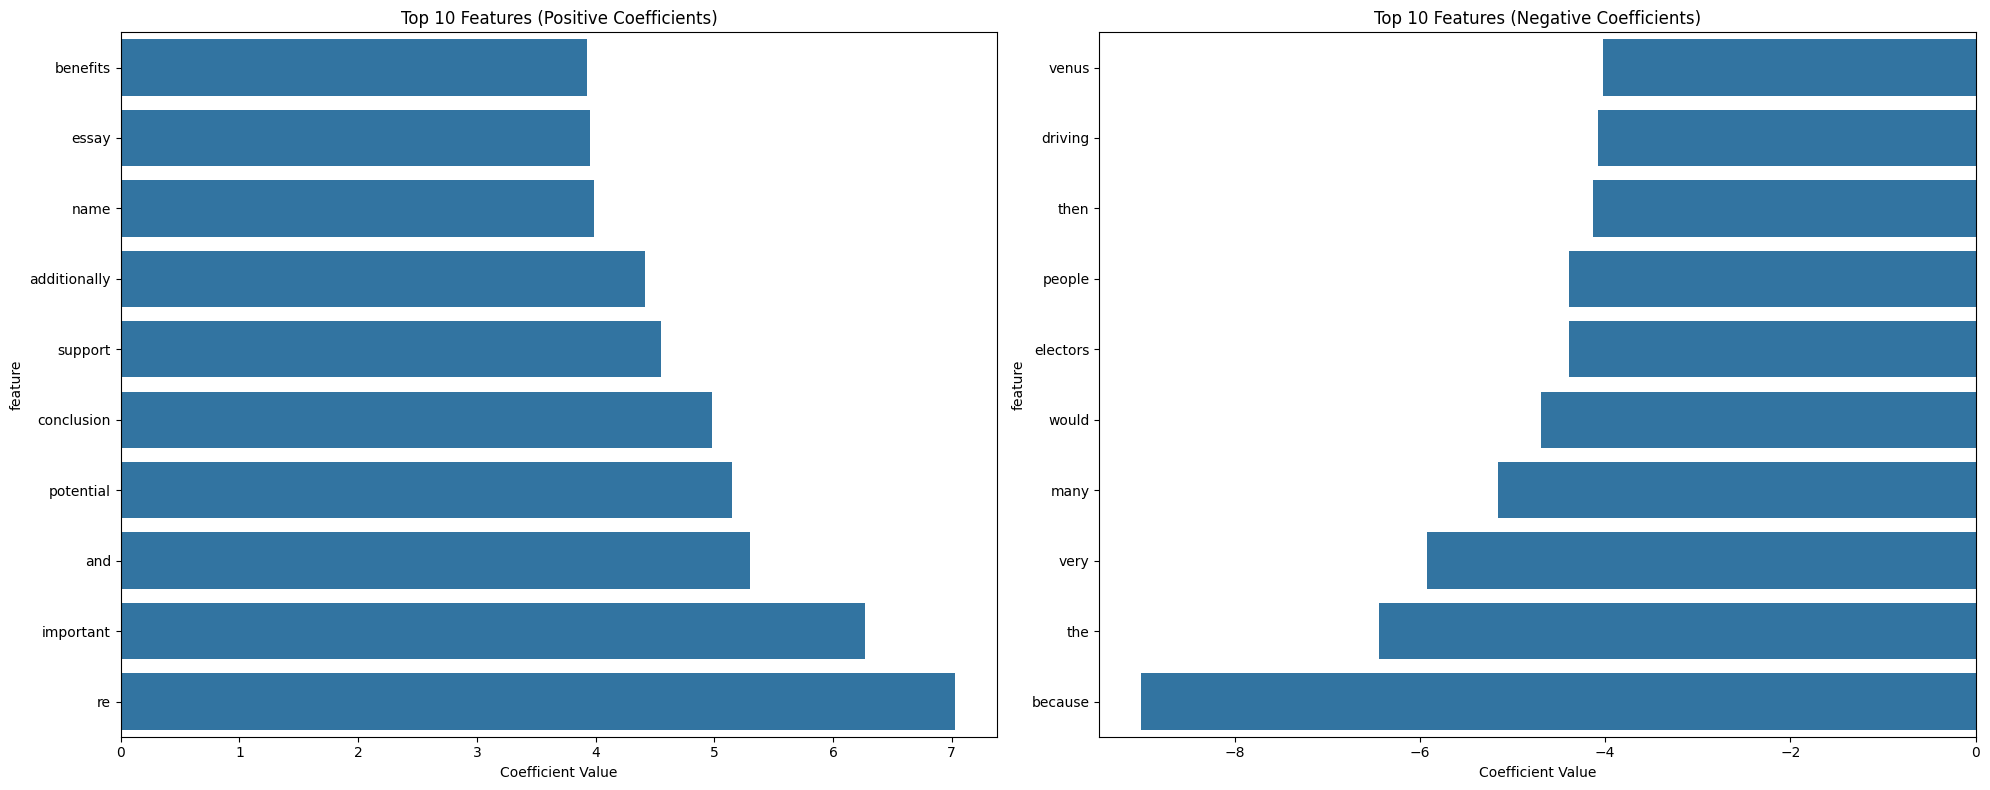

In [59]:
# Get feature importance from logistic regression coefficients
feature_importance = pd.DataFrame({
    'feature': features,
    'coef': lr_model.coef_[0],  # Remove abs() to keep sign
    'importance': abs(lr_model.coef_[0])
})

# Create separate dataframes for positive and negative coefficients
pos_features = feature_importance[feature_importance['coef'] > 0].sort_values('importance', ascending=True)
neg_features = feature_importance[feature_importance['coef'] < 0].sort_values('importance', ascending=True)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot positive coefficients
sns.barplot(data=pos_features.tail(10), 
           y='feature',
           x='coef',
           ax=ax1)
ax1.set_title('Top 10 Features (Positive Coefficients)')
ax1.set_xlabel('Coefficient Value')

# Plot negative coefficients  
sns.barplot(data=neg_features.tail(10),
           y='feature', 
           x='coef',
           ax=ax2)
ax2.set_title('Top 10 Features (Negative Coefficients)')
ax2.set_xlabel('Coefficient Value')

plt.tight_layout()
plt.show()


## Random Forest

Model: Random Forest
AUC-ROC: 0.9730
Accuracy: 0.9788


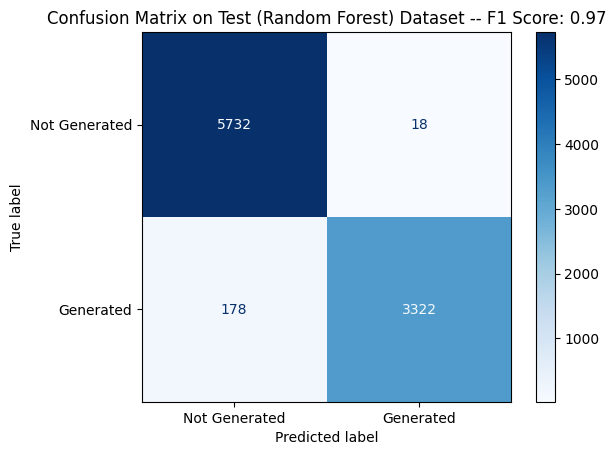

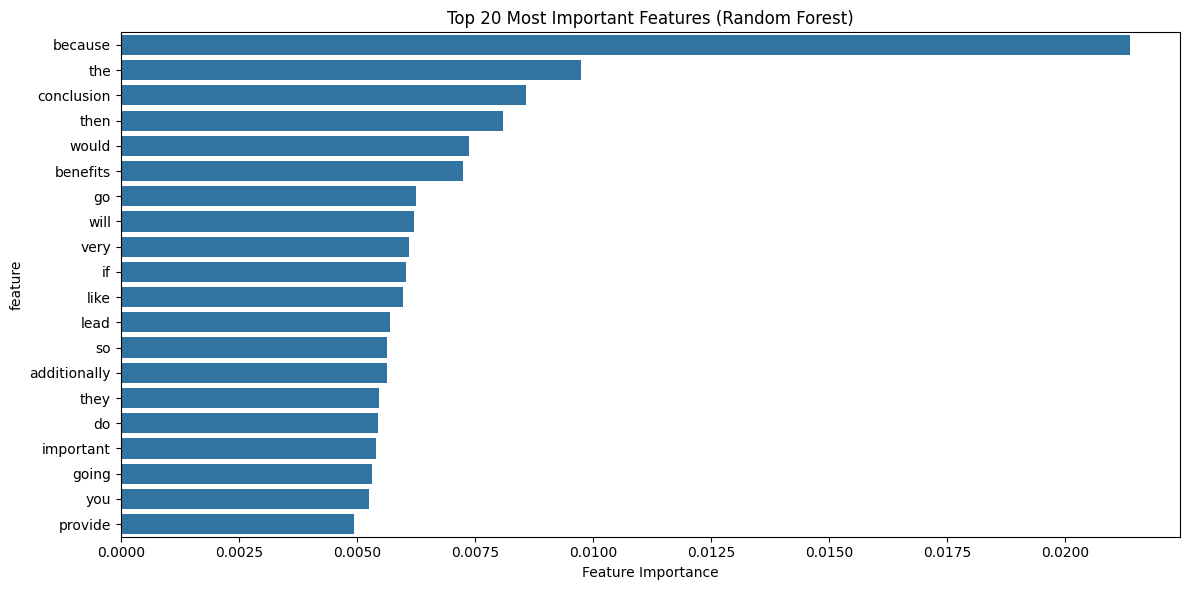

In [60]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Apply Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

y_pred_rf, rf_roc_auc, rf_accuracy = run_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# Display confusion matrix for Random Forest results
displayConfusionMatrix(np.asarray(y_test), np.asarray(y_pred_rf), "Test (Random Forest)")

# Get feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_rf.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


Parts of EDA are borrowed from https://www.kaggle.com/code/alexia/kerasnlp-starter-notebook-llm-detect-ai-generate/notebook